In [1]:
#import the needed libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
from sklearn.datasets import fetch_california_housing




In [3]:
df=fetch_california_housing(as_frame=True)

In [4]:
df , targets= df.data , df.target

In [5]:
df['price']=targets

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
#lets have a look on the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
# checking the missing values 
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [10]:
# correlation 
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [11]:
import seaborn as sns 


#### dependent and independent features 


In [12]:
X=df.iloc[:,:-1]### take all the  columns except the last one (price column )
Y=df.iloc[:,-1]

In [45]:
### splt the data to train , val , split 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test =train_test_split(X, Y, train_size=0.8,  shuffle=True)
x_val, x_test, y_val, y_test=train_test_split(x_test,y_test, train_size=0.5, shuffle=False )

In [14]:
print(" teh dhape of the training set is ", x_train.shape)
print("the shape of the test set is ", x_test.shape)
print("the shape of the validation set is ",x_test.shape)

 teh dhape of the training set is  (16512, 8)
the shape of the test set is  (2064, 8)
the shape of the validation set is  (2064, 8)


In [42]:
## standardize the dataset 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [43]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [46]:
x_train=scaler.fit_transform(x_train)  ## this fucntion calculate the stadar deviation and the mean and do the transformation after that 
x_test=scaler.transform(x_test)   ### here this function usese the standard deviation and the meain that are already calculated by the previous function 
x_val=scaler.transform(x_val)   ## as we did witht the test 


array([[-0.60799981,  0.5056992 , -0.38702861, ..., -0.06800382,
         0.62996962, -1.22114691],
       [-0.39003359,  0.82342625, -0.41168962, ...,  0.0043116 ,
        -0.75220183,  0.55426722],
       [ 0.22645415, -1.63895839,  0.68232601, ..., -0.02754595,
        -0.94430024,  1.30233497],
       ...,
       [-0.42813144, -0.28861843, -0.145707  , ..., -0.02562947,
        -0.75688716,  0.72382924],
       [ 0.48383924,  0.18797215,  0.39100021, ..., -0.06698746,
        -1.33318238,  1.18264413],
       [-0.44947892,  0.66456272,  0.25682204, ..., -0.00731641,
        -1.35660901,  1.26742514]], shape=(16512, 8))

In [49]:
import pickle
pickle.dump(scaler, open('scalar.pkl','wb'))

### Model Training 

In [17]:
from sklearn.linear_model import LinearRegression
##using linear regression
regression_model=LinearRegression()



In [18]:
regression_model.fit(x_train, y_train)

LinearRegression()

In [19]:
print(regression_model.coef_)

[ 0.82669283  0.12039916 -0.26370127  0.30097703 -0.00671279 -0.03958588
 -0.91028637 -0.88267413]


In [20]:
#### check the b value or the intercept 
print(regression_model.intercept_)

2.0733281746608565


In [21]:
predictions=regression_model.predict(x_test)
predictions

array([2.65409789, 2.67752392, 2.28842833, ..., 2.93684786, 1.87727404,
       3.31015985], shape=(2064,))

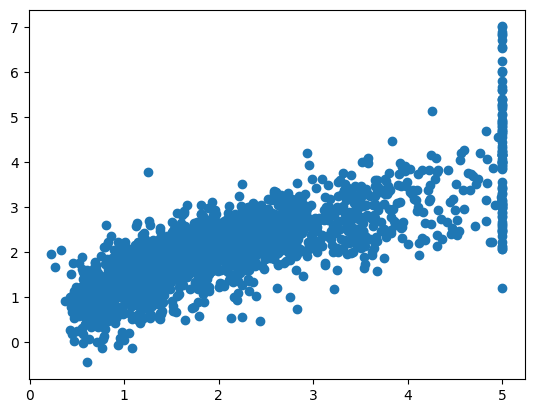

In [22]:
# plot a scater plot for the prediction 
plt.scatter(y_test, predictions)  # if the plot is linear we can say that the prediction is good q

In [23]:
error =y_test-predictions
error 

8659     0.709902
9180     2.322486
17218    0.711572
12379   -0.313415
7514    -0.373226
           ...   
17373   -1.292367
1083     0.248091
6366     0.181152
13260   -0.137274
17029   -0.729160
Name: price, Length: 2064, dtype: float64

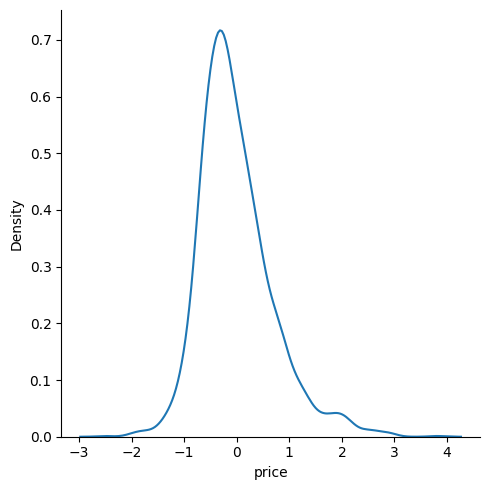

In [24]:
sns.displot(error, kind="kde")

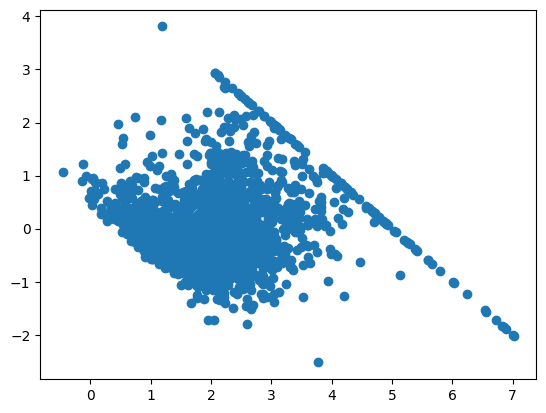

In [25]:
## scatter plot with respect tp predictions and errors 
plt.scatter(predictions, error )

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))
print(np.sqrt(mean_squared_error(y_test, predictions)))


0.4888035862922728
0.5289834212551742
0.6991448964930466


### saving teh model in a pickel file 

In [27]:
import pickle

In [28]:
pickle.dump(regression_model, open('regmodel.pkl', 'wb'))

In [29]:
loaded_model=pickle.load(open('regmodel.pkl', 'rb'))


In [30]:
loaded_model

LinearRegression()

In [33]:
dataset=pickle.load(open('scaler.pkl', 'rb'))

In [34]:
dataset

StandardScaler()